In [4]:
pip install pandas

In [5]:
pip install matplotlib

In [6]:
pip install seaborn

In [7]:
pip install sklearn

In [8]:
pip install mlxtend

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#to read the dataset
df=pd.read_csv("loan_train.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


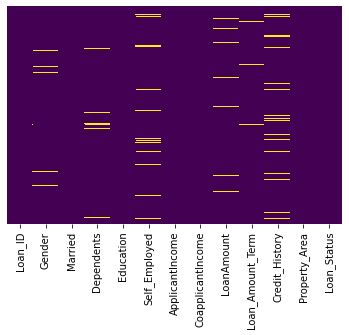

In [11]:
#Heat map showing values which are not available or null
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
sex = pd.get_dummies(df['Gender'],drop_first=True)


In [13]:
df.drop(['Gender','Loan_ID'],axis=1,inplace=True)
df = pd.concat([df,sex],axis=1)
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [14]:
married = pd.get_dummies(df['Married'],drop_first=True)
education = pd.get_dummies(df['Education'],drop_first=True)
df.drop(['Married','Education'],axis=1,inplace=True)
df = pd.concat([df,married,education],axis=1)
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes,Not Graduate
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0


In [15]:
df=df.rename(columns={'Yes':'Married','Male':'Gender'})
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0


In [16]:
df=df.rename(columns={'Sf':'Self_Employed'})
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0


In [17]:
self_emp = pd.get_dummies(df['Self_Employed'],drop_first=True)
df.drop(['Self_Employed'],axis=1,inplace=True)
df = pd.concat([df,self_emp],axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate,Yes
0,0,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0
1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0
4,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0


In [18]:
df=df.rename(columns={'Yes':'Self_Employed'})
df.head(50)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate,Self_Employed
0,0,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0
1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0
4,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0
5,2,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,0,1
6,0,2333,1516.0,95.0,360.0,1.0,Urban,Y,1,1,1,0
7,3+,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1,1,0,0
8,2,4006,1526.0,168.0,360.0,1.0,Urban,Y,1,1,0,0
9,1,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1,1,0,0


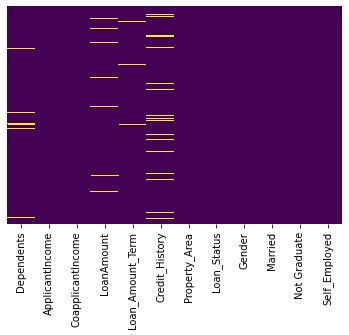

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

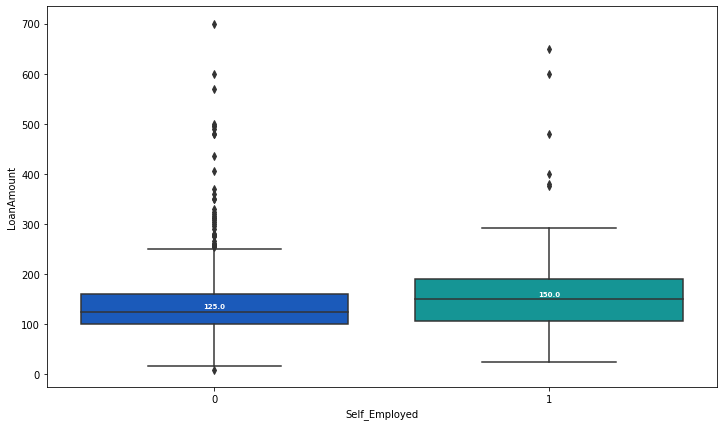

In [20]:
plt.figure(figsize=(12, 7))
bx=sns.boxplot(x='Self_Employed',y='LoanAmount',data=df,palette='winter')
medians=df.groupby(['Self_Employed'])['LoanAmount'].median()
vertical_offset=df['LoanAmount'].median() * 0.05
for xtick in bx.get_xticks():
    bx.text(xtick,medians[xtick]+vertical_offset,medians[xtick],horizontalalignment='center',size='x-small',color='w',weight='semibold')

In [21]:
def impute_LoanAmt(cols):
    Loan = cols[0]
    selfemp = cols[1]
    
    if pd.isnull(Loan):

        if selfemp == 1:
            return 150
        else:
            return 125

    else:
        return Loan

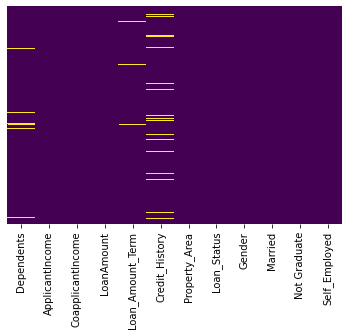

In [22]:
df['LoanAmount'] = df[['LoanAmount','Self_Employed']].apply(impute_LoanAmt,axis=1)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

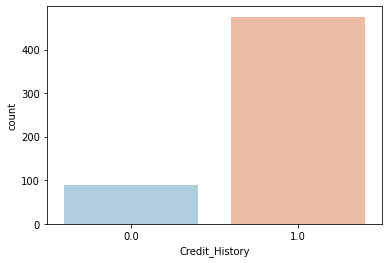

In [23]:
sns.countplot(x='Credit_History',data=df,palette='RdBu_r')

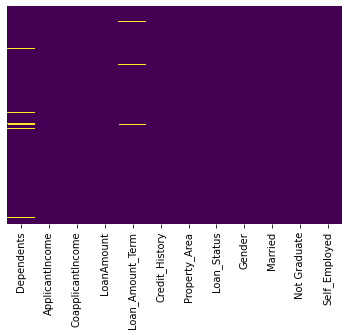

In [24]:
df['Credit_History'].fillna(1.0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

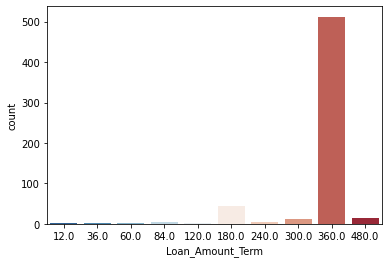

In [25]:
sns.countplot(x='Loan_Amount_Term',data=df,palette='RdBu_r')

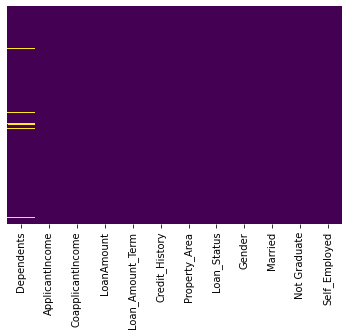

In [26]:
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


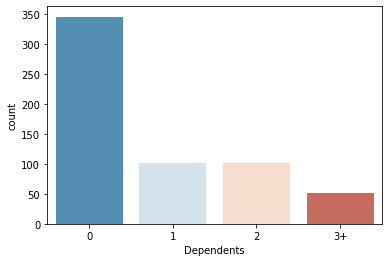

In [27]:
sns.countplot(x='Dependents',data=df,palette='RdBu_r')

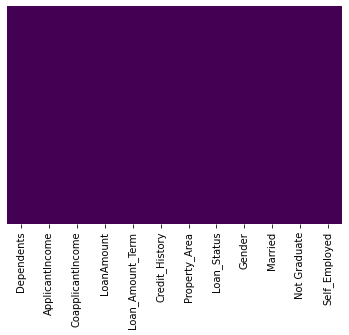

In [28]:
df['Dependents'].fillna(0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
loanStatus = pd.get_dummies(df['Loan_Status'],drop_first=True)
df.drop(['Loan_Status'],axis=1,inplace=True)
df = pd.concat([df,loanStatus],axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Not Graduate,Self_Employed,Y
0,0,5849,0.0,125.0,360.0,1.0,Urban,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,Rural,1,1,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,1,1,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,0,1


In [30]:
PropArea = pd.get_dummies(df['Property_Area'],drop_first=True)
df.drop(['Property_Area'],axis=1,inplace=True)
df = pd.concat([df,PropArea],axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Not Graduate,Self_Employed,Y,Semiurban,Urban
0,0,5849,0.0,125.0,360.0,1.0,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,1


In [31]:
df=df.rename(columns={'Y':'Loan_Status'})

In [32]:
df=df.replace(to_replace='3+',value=3)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train=pd.DataFrame(df.drop('Loan_Status',axis=1))
scaler.fit(train)
scaled_features = scaler.transform(train)
df_feat = pd.DataFrame(scaled_features,columns=train.columns)
df_feat.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Not Graduate,Self_Employed,Semiurban,Urban
0,-0.737806,0.072991,-0.554487,-0.247076,0.273231,0.411733,0.505592,-1.357421,-0.528362,-0.392601,-0.782016,1.428147
1,0.253470,-0.134412,-0.038732,-0.211384,0.273231,0.411733,0.505592,0.736691,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.737806,-0.393747,-0.554487,-0.949028,0.273231,0.411733,0.505592,0.736691,-0.528362,2.547117,-0.782016,1.428147
3,-0.737806,-0.462062,0.251980,-0.306564,0.273231,0.411733,0.505592,0.736691,1.892641,-0.392601,-0.782016,1.428147
4,-0.737806,0.097728,-0.554487,-0.056717,0.273231,0.411733,0.505592,-1.357421,-0.528362,-0.392601,-0.782016,1.428147


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Loan_Status'],
                                                    test_size=0.30)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 27  32]
 [ 11 115]]
              precision    recall  f1-score   support

           0       0.71      0.46      0.56        59
           1       0.78      0.91      0.84       126

    accuracy                           0.77       185
   macro avg       0.75      0.69      0.70       185
weighted avg       0.76      0.77      0.75       185



In [38]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

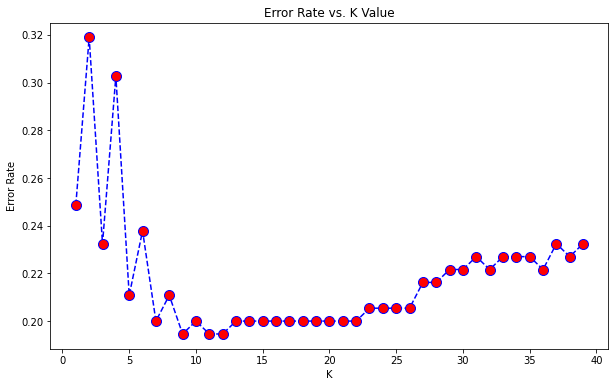

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [41]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 26  33]
 [  4 122]]
              precision    recall  f1-score   support

           0       0.87      0.44      0.58        59
           1       0.79      0.97      0.87       126

    accuracy                           0.80       185
   macro avg       0.83      0.70      0.73       185
weighted avg       0.81      0.80      0.78       185



In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.8


In [75]:
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [43]:
df.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',
       'Not Graduate', 'Self_Employed', 'Loan_Status', 'Semiurban', 'Urban'],
      dtype='object')

In [77]:
x=df[['Married', 'Not Graduate', 'Dependents',
       'Self_Employed','ApplicantIncome','CoapplicantIncome','Semiurban','Urban','Loan_Amount_Term','Credit_History']]
y=df['LoanAmount']



In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(x.values,y.values,test_size=0.3,random_state=101)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
print(lm.intercept_)

55.50899686613461


In [106]:
coeff=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff

,Coefficient
Married,20.641931
Not Graduate,-17.026395
Dependents,10.201953
Self_Employed,14.170060
ApplicantIncome,0.006799
CoapplicantIncome,0.006619
Semiurban,-7.765598
Urban,-11.591580
Loan_Amount_Term,0.089799
Credit_History,-1.739083


In [107]:
pred1=lm.predict(X_test)

In [108]:
from sklearn.metrics import max_error,explained_variance_score,mean_absolute_error
print(max_error(Y_test,pred1))
print(explained_variance_score(Y_test,pred1))
print(mean_absolute_error(Y_test,pred1))

413.43499346257795
0.3214675018091705
41.801807761232475


In [109]:
dfx = pd.DataFrame({

   'Original': Y_test,

   'Predicted': pred1

   })


In [110]:
lm.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])

array([186.97891948])

In [111]:
from sklearn import linear_model


In [112]:
bm=linear_model.BayesianRidge()
bm.fit(X_train,Y_train)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [113]:
pred2=bm.predict(X_test)

In [114]:
coeff2=pd.DataFrame(bm.coef_,x.columns,columns=['Coefficient'])
coeff2

,Coefficient
Married,2.843843e-05
Not Graduate,-1.198853e-05
Dependents,6.220559e-05
Self_Employed,8.655873e-06
ApplicantIncome,7.298739e-03
CoapplicantIncome,6.777225e-03
Semiurban,6.237917e-07
Urban,-9.444087e-06
Loan_Amount_Term,1.483196e-03
Credit_History,-1.084215e-06


In [115]:
bm.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])

array([143.98938586])

In [116]:
print(max_error(Y_test,pred2))
print(explained_variance_score(Y_test,pred2))
print(mean_absolute_error(Y_test,pred2))

408.17309929462255
0.36083769861655324
40.40674500101228


In [117]:
!pip install xgboost



In [118]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,Y_train)

[10:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [119]:
yhat = model.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])
print('Predicted: %.3f' % yhat)

Predicted: 155.877


In [122]:
pred3=model.predict(X_test)

In [124]:
print(explained_variance_score(Y_test,pred3))
print(max_error(Y_test,pred3))

0.2993818239320474
429.33946228027344


In [126]:
 from sklearn.ensemble import RandomForestRegressor
 regr = RandomForestRegressor(max_depth=2, random_state=0)
 regr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [127]:
regr.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])

array([123.46250175])

In [131]:
pred4=regr.predict(X_test)

In [132]:
print(explained_variance_score(Y_test,pred4))
print(max_error(Y_test,pred4))

0.41044459436904535
295.2034414641407
